In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import scipy

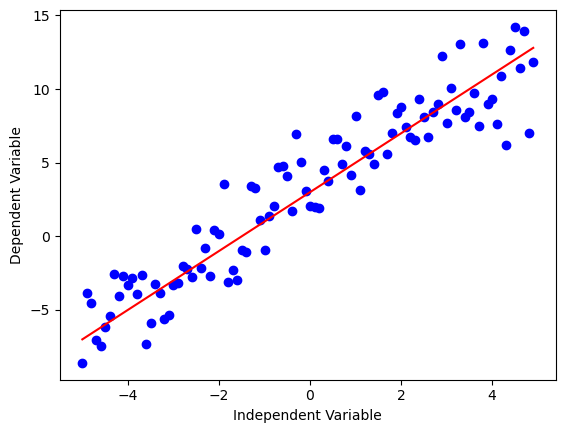

In [2]:
plt.style.use(['default'])
# Let's see y = 2x + 3 equation looks like 일차함수 예
x = np.arange(-5.0, 5.0, 0.1)

y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
# plt.figure(figsize=(8,6))
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

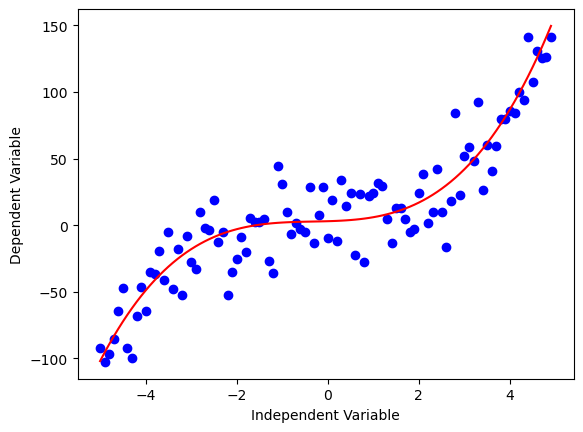

In [3]:
# Non Linear Regression 의 대표적인 예는 Polynomial Regression 이다
# 그 외 Non Linear Regression 의 종류로는 지수함수(Exponential), log함수, 분수함수 등이 있다
# 삼차함수(Cubic functions)의 예
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x +3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

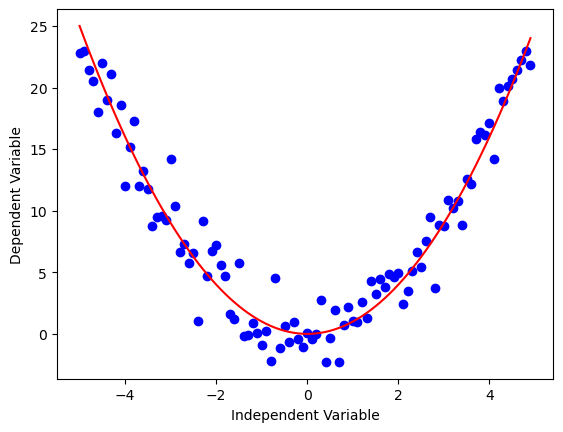

In [4]:
# 이차함수(Quadratic)
x = np.arange(-5.0, 5.0, 0.1)
y = np.power(x,2)

y_noise = 2*np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

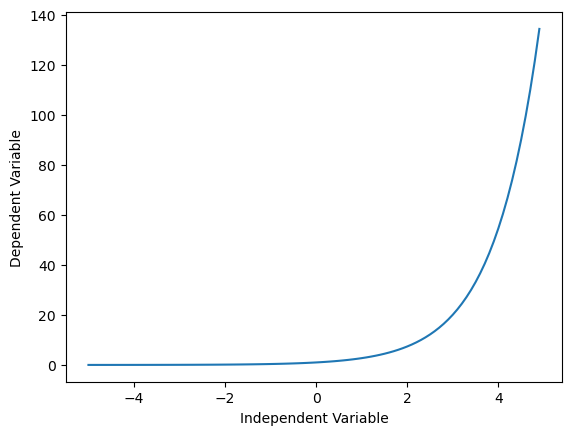

In [5]:
# 지수함수(Exponential)
X = np.arange(-5.0, 5.0, 0.1)
Y = np.exp(X)

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

/var/folders/lw/t_96h5c913bfc328579th71r0000gn/T/ipykernel_8141/2594393609.py:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


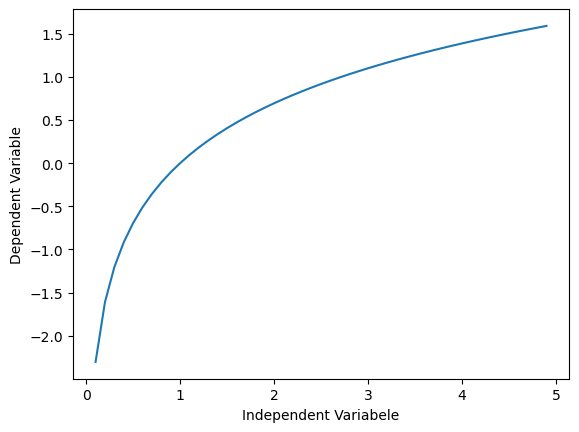

In [6]:
# Logarithmic(로그함수)
X = np.arange(-5.0, 5.0, 0.1)
Y = np.log(X)

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variabele')
plt.show()

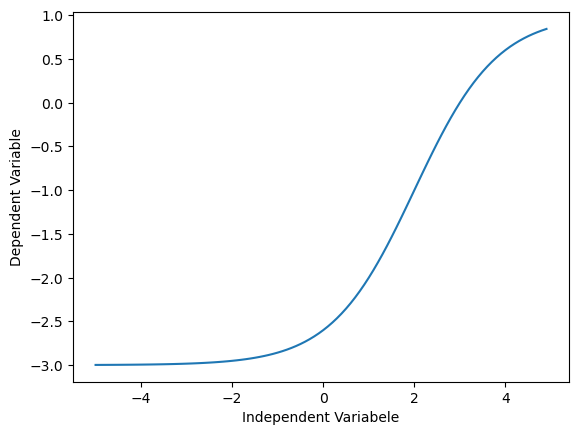

In [7]:
# Sigmoidal/Logistic (시그모이드/로지스틱 함수)
X = np.arange(-5.0, 5.0, 0.1)
Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variabele')
plt.show()

In [8]:
# Let's try and fit Non-Linear Regression model to China's GDP from 1960 to 2014
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv'

df = pd.read_csv(path)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


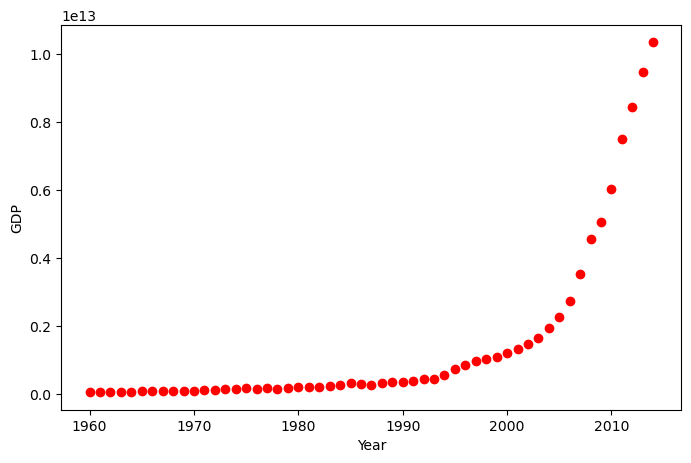

In [9]:
# Plotting
plt.figure(figsize=(8,5))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

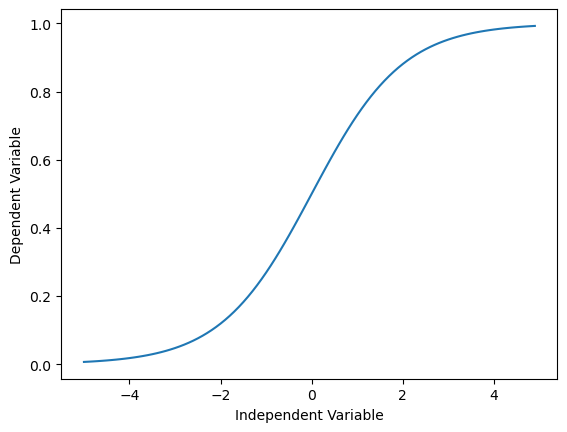

In [10]:
# So, it looks like exponential or sigmoidal.
# But let's apply logistic function first since its growth slightly decreases since 2010
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [11]:
# Build the model
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1+np.exp(-Beta_1*(x-Beta_2)))
    return y

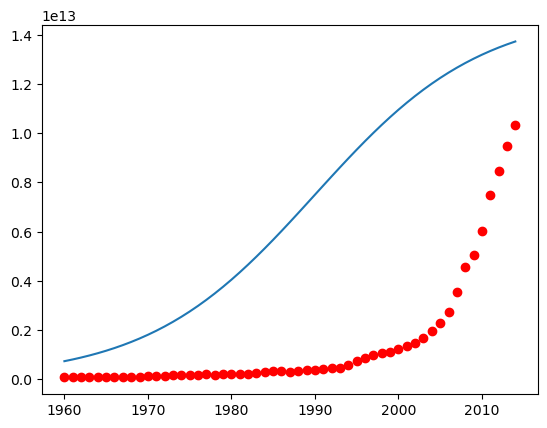

In [12]:
beta_1 = 0.10
beta_2 = 1990.0

# logistic function
Y_pred = sigmoid(x_data, beta_1, beta_2)
# Plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [13]:
# Let's normalize our data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [14]:
# Let's find the best parameters using curve_fit
# popt are our optimized parameters
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print('beta_1 = %f, beta_2 = %f' % (popt[0], popt[1]))

beta_1 = 690.453017, beta_2 = 0.997207


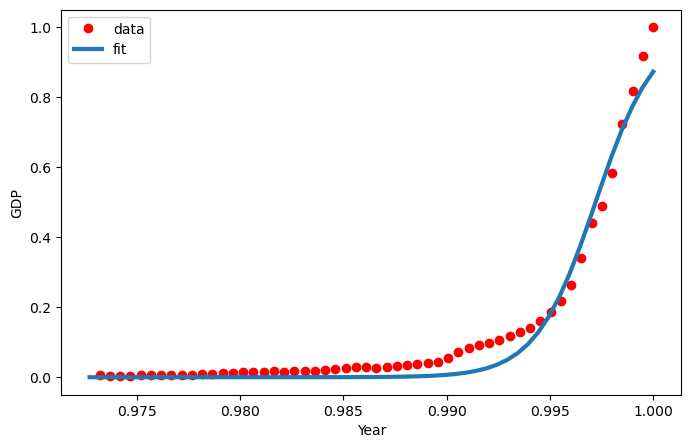

In [15]:
# plotting
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label = 'data')
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best') # 범례 표시하기
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()


In [16]:
# Let's calculate the accuracy of the model
# First we need to create train and test dataset. Let's use normalized data
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [17]:
# build the model with the training set and calculate the best parameters
popt, pcov = curve_fit(sigmoid, train_x, train_y)
print('beta_1 = %f, beta_2 = %f' % (popt[0], popt[1]))


beta_1 = 673.738076, beta_2 = 0.997137


In [21]:
# Predict with the testing set
yhat = sigmoid(test_x, *popt)
print(yhat)

[5.23235264e-07 3.89399891e-06 1.48430993e-05 2.89791215e-05
 5.65770098e-05 7.90521361e-05 1.10454484e-04 1.54329047e-04
 2.23773587e-03 3.12396591e-03 8.47653324e-03 3.21341659e-01
 4.80370541e-01]


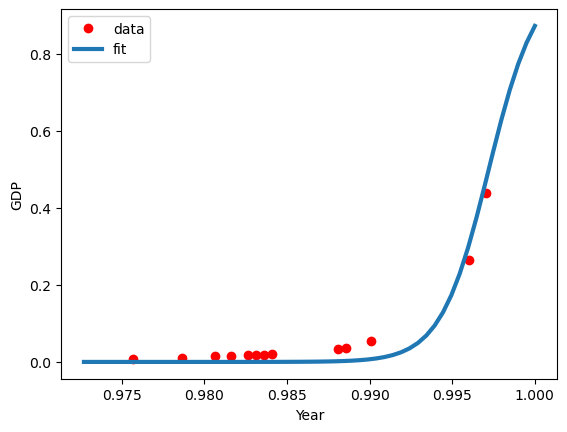

In [22]:
# Let's plot our regression model
plt.plot(test_x, test_y, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [20]:
# Evaluation
print('Mean absolute error: %.2f' % np.mean(np.absolute(yhat - test_y)))
print('Residual sum of squares(MSE): %.2f' % np.mean((yhat - test_y)**2))

from sklearn.metrics import r2_score
print('R2-score: %.2f' % r2_score(test_y, yhat))

Mean absolute error: 0.03
Residual sum of squares(MSE): 0.00
R2-score: 0.94
